In [1]:
import sys
lib_path = '/home/jovyan/libs'
sys.path.insert(0, lib_path)

In [3]:
from utils import audio

import torch
import matplotlib.pyplot as plt
from datasets import load_from_disk

KeyboardInterrupt: 

In [12]:
snippets = torch.load("tensors/snippets.pt", weights_only=True).detach()
data = load_from_disk("../tedlium/train.hf").with_format("torch").select(range(10))

Loading dataset from disk:   0%|          | 0/109 [00:00<?, ?it/s]

In [13]:
data[0]["audio"]

tensor([ 0.1217,  0.1455,  0.1716,  ..., -0.0010, -0.0020, -0.0035])

In [14]:
best = snippets[-1]

In [17]:
example = data[0]
hehe = example["audio"]

In [18]:
attacked = torch.cat([best, hehe])

In [25]:
attacked.size(0)

63840

In [31]:
mel = audio.mel_image(attacked, "viridis")

In [42]:
mel.size()

torch.Size([80, 399, 4])

In [32]:
line = best.size(0)

In [38]:
line

10240

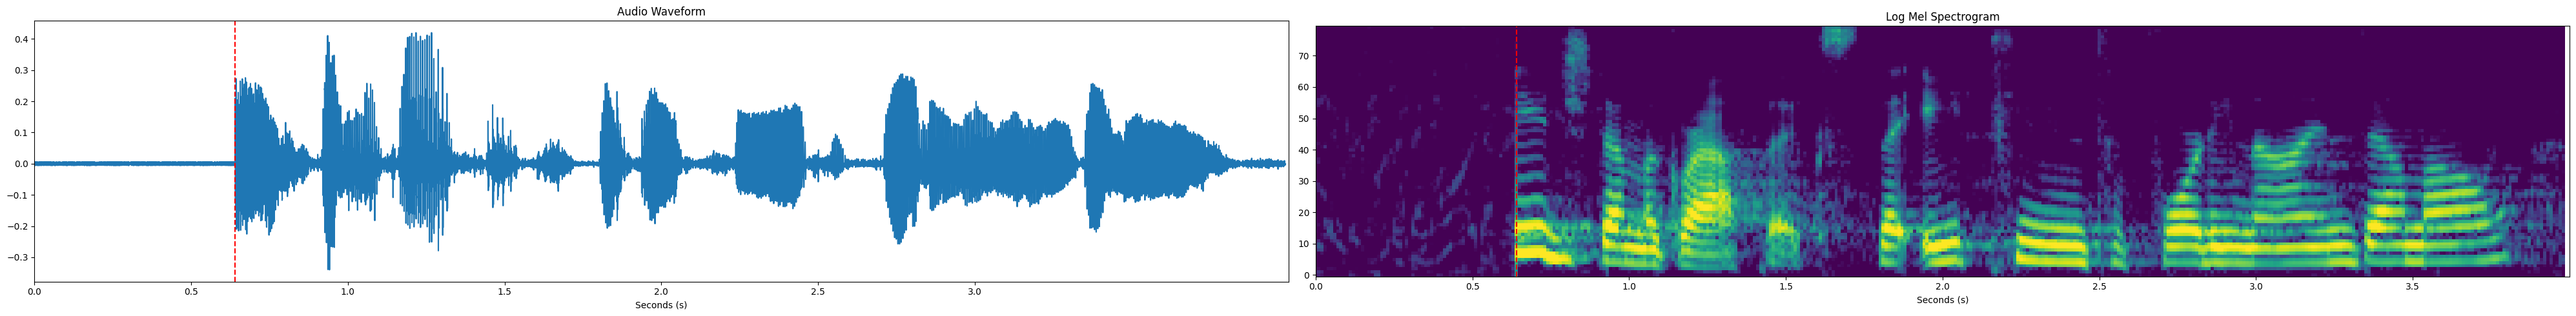

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(40, 5))
ax[0].plot(attacked)
ax[0].set_title("Audio Waveform")
ax[0].axvline(x=line, color="r", linestyle="--")
ax[0].set_xticks([t for t in range(0, 56_000, 8_000)], [t / 16_000 for t in range(0, 56_000, 8_000)])
ax[0].set_xlim(left=0, right=64_000)
ax[0].set_xlabel("Seconds (s)")

ax[1].imshow(mel, origin="lower")
ax[1].set_title("Log Mel Spectrogram")
ax[1].axvline(x=line / 16_000 * 100, color="r", linestyle="--")
ax[1].set_xticks([t for t in range(0, 400, 50)], [t * 0.01 for t in range(0, 400, 50)])
ax[1].set_xlim(left=0, right=400)
ax[1].set_xlabel("Seconds (s)")

plt.tight_layout()
plt.savefig("demonstration.png")
plt.show()

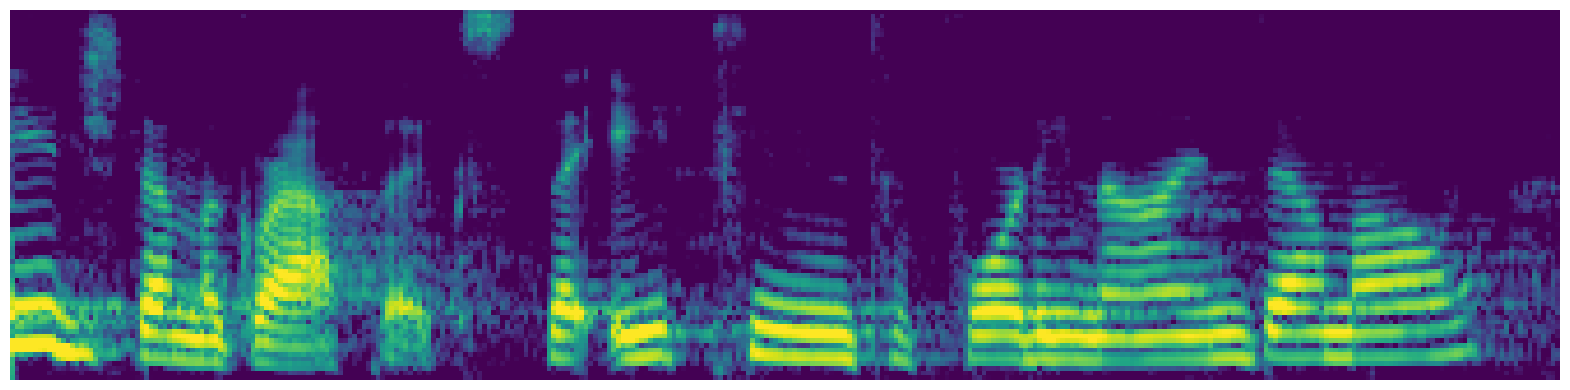

In [57]:
plt.figure(figsize=(20, 6))
plt.imshow(audio.mel_image(example["audio"], "viridis"), origin="lower")
plt.axis("off")
plt.show()